In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# to change...
np.random.seed(42)

data = pd.read_csv('Perceptron-2Data.csv')
print(data.head(5))

redPoints = pd.DataFrame()
bluePoints = pd.DataFrame()

X = data.drop('class', axis=1)
y = data['class']



        X1        X2  class
0  0.78051 -0.063669      1
1  0.28774  0.291390      1
2  0.40714  0.178780      1
3  0.29230  0.421700      1
4  0.50922  0.352560      1


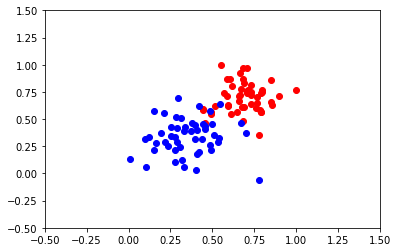

In [2]:
redPoints = pd.DataFrame()
bluePoints = pd.DataFrame()

for index, row in data.iterrows() :
    if(row['class'] == 1.0) :
        bluePoints = bluePoints.append(data.iloc[index])
    else :
        redPoints = redPoints.append(data.iloc[index])

plt.scatter(redPoints['X1'], redPoints['X2'], color='red')
plt.scatter(bluePoints['X1'], bluePoints['X2'], color='blue')
plt.axis([-0.5, 1.5, -0.5, 1.5])

plt.xticks()
plt.yticks()

plt.show()

In [20]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b) :
    return stepFunction((np.matmul(X,W)+b)[0])

In [ ]:
def perceptronStep(X, y, W, b, learn_rate = 0.01) :
    for i in range(len(X)):
        y_hat = prediction(X.loc[i],W,b)
        print(X.iloc[i].T[0])
        if (y[i]-y_hat == 1) :
                W[0] = W[0] + (X.iloc[i].T[0]*learn_rate)
                W[1] = W[1] + (X.iloc[i].T[1]*learn_rate)
                b += learn_rate
        elif (y[i]-y_hat == -1) :
                W[0] = W[0] - (X.iloc[i].T[0]*learn_rate)
                W[1] = W[1] - (X.iloc[i].T[1]*learn_rate)
                b -= learn_rate
    return W, b

In [32]:
def perceptronStep(X, y, W, b, learn_rate = 0.01): # this code works the graphics dont.
    X = X.values
    
    for i in range(len(X)):
        
        label = y[i]
        X1 = X[i][0]
        X2 = X[i][1]
        
        pred = prediction(X[i], W, b)
      
        if pred == 1 and label == 0.0 :
            W[0] = W[0] - (X1*learn_rate)
            W[1] = W[1] - (X2*learn_rate)
            b -= learn_rate
            
        elif pred == 0 and label == 1.0 :
            W[0] = W[0] + (X1*learn_rate)
            W[1] = W[1] + (X2*learn_rate)
            b += learn_rate
                        
    return W, b

In [33]:
def graph(lines) :
    plt.scatter(redPoints['X1'], redPoints['X2'], color='red')
    plt.scatter(bluePoints['X1'], bluePoints['X2'], color='blue')
    plt.axis([-0.5, 1.5, -0.5, 1.5])

    for i in range(len(lines)) :
        plt.plot([lines[i][1][0], lines[i][0][0]], 'g--', linewidth=1)

    plt.xticks()
    plt.yticks()

    plt.show()

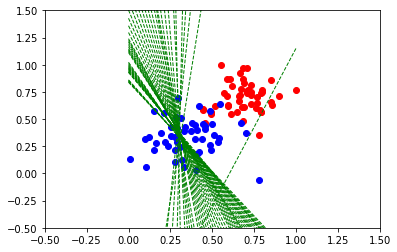

In [34]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50) :
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = max(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    boundary_lines = []
    for i in range(num_epochs) :
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))

    return boundary_lines

graph(trainPerceptronAlgorithm(X, y))